In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(iris.data, columns=columns)
df['target'] = iris.target
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


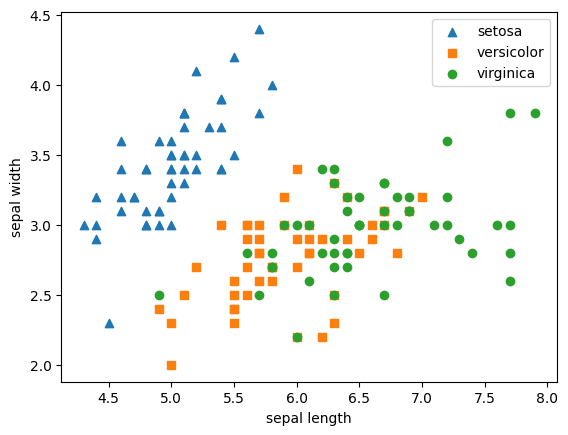

In [5]:
#setosa는  세모, versicolor는  네모, virginica는  동그라미

markers = ['^', 's', 'o']

#setos target 값은 0, versicolor1 virginica 2
for i, marker in enumerate(markers):
  x_axis_data = df[df['target'] == i]['sepal_length']
  y_axis_data = df[df['target'] == i]['sepal_width']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(df.iloc[:,:-1])

In [8]:
iris_scaled.shape

(150, 4)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(iris_scaled)

iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [9]:
pca_columns = ['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_pca['target'] = iris.target
df_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


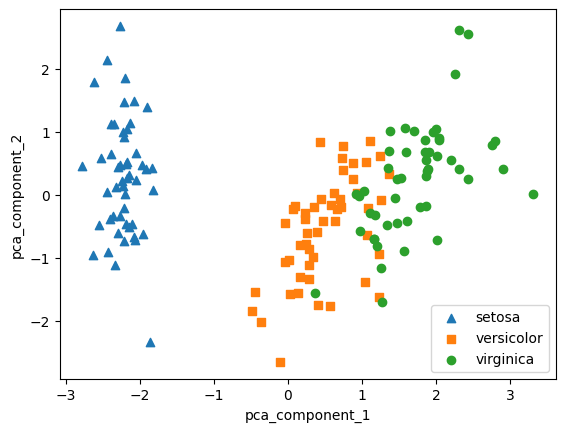

In [10]:
#setosa는  세모, versicolor는  네모, virginica는  동그라미

markers = ['^', 's', 'o']

#setos target 값은 0, versicolor1 virginica 2
for i, marker in enumerate(markers):
  x_axis_data = df_pca[df_pca['target'] == i]['pca_component_1']
  y_axis_data = df_pca[df_pca['target'] == i]['pca_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.legend()
plt.show()

In [11]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy  as  np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy', cv=3)
print('원본  데이터  교차  검증  개별   정확도:', scores)
print('원본  데이터   평균  정확도:', np. mean (scores))

원본  데이터  교차  검증  개별   정확도: [0.98 0.94 0.96]
원본  데이터   평균  정확도: 0.96


In [14]:
pca_X = df_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X,  iris.target, scoring='accuracy',  cv=3 )
print('PCA 변환  데이터  교차  검증  개별   정확도:', scores_pca)
print( 'PCA  변환  데이터   평균  정확도:', np. mean (scores_pca))

PCA 변환  데이터  교차  검증  개별   정확도: [0.88 0.88 0.88]
PCA  변환  데이터   평균  정확도: 0.88


In [18]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/UCI_Credit_Card.csv')
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [19]:
df .rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

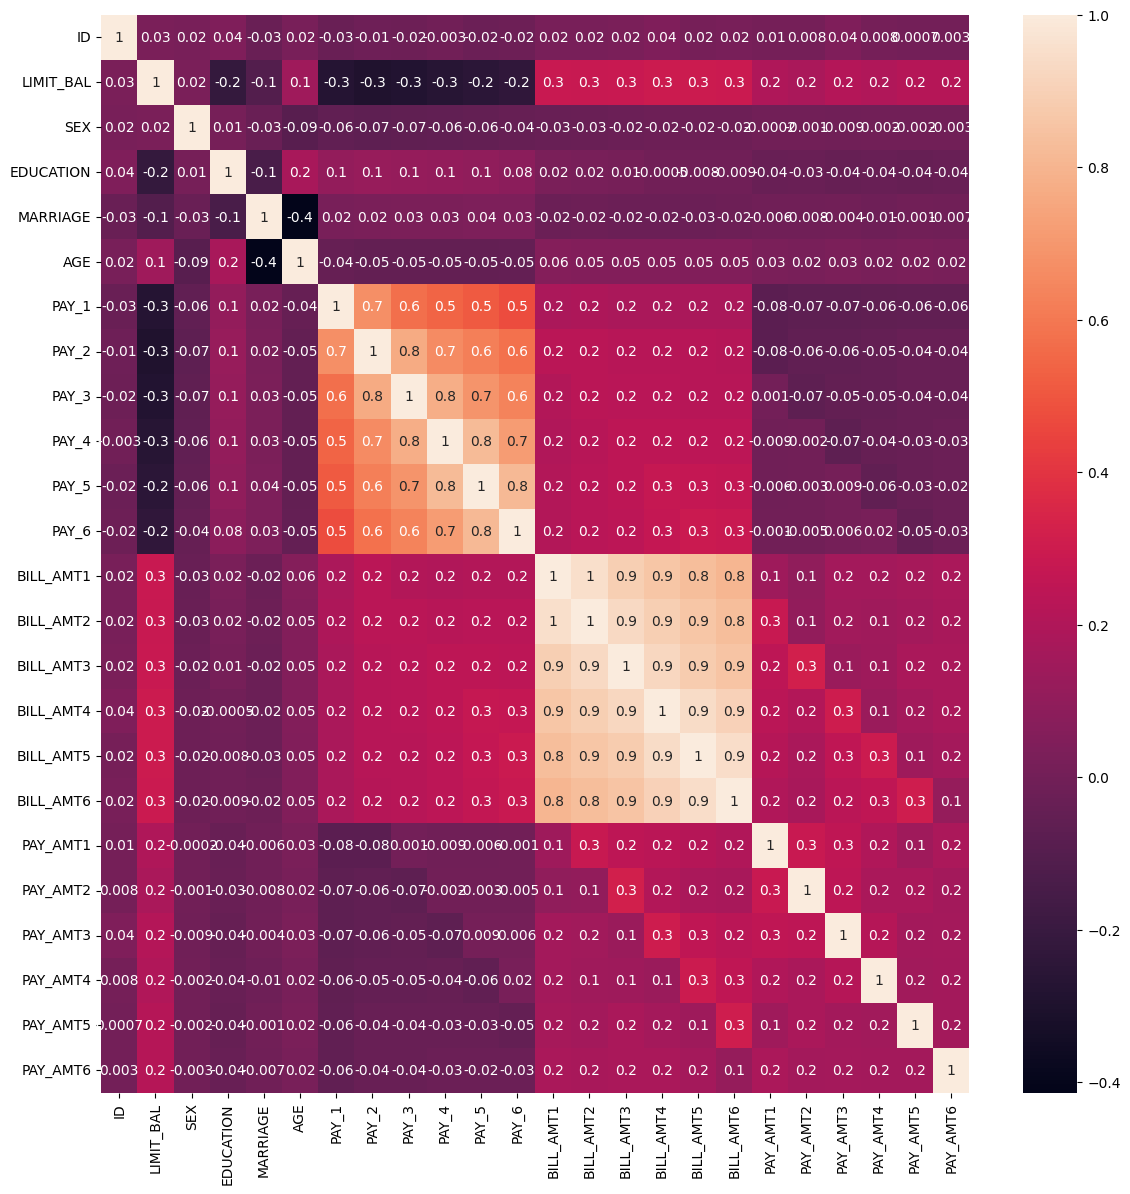

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot = True, fmt = '.1g')
plt.show()

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

scaler = StandardScaler()
df_cols_scale= scaler.fit_transform(df[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scale)
print('PCA component별 변동성: ', pca.explained_variance_ratio_)

PCA component별 변동성:  [0.90555253 0.0509867 ]


In [30]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)
print('원본  데이터  교차  검증  개별   정확도:', scores)
print('원본  데이터   평균  정확도:{0:.4f}'.format(np. mean (scores)))

원본  데이터  교차  검증  개별   정확도: [0.257  0.8209 0.784 ]
원본  데이터   평균  정확도:0.6206


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

scores_pca = cross_val_score(rcf, X_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))


CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7758 0.8003 0.804 ]
PCA 변환 데이터 세트 평균 정확도: 0.7934


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda =LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


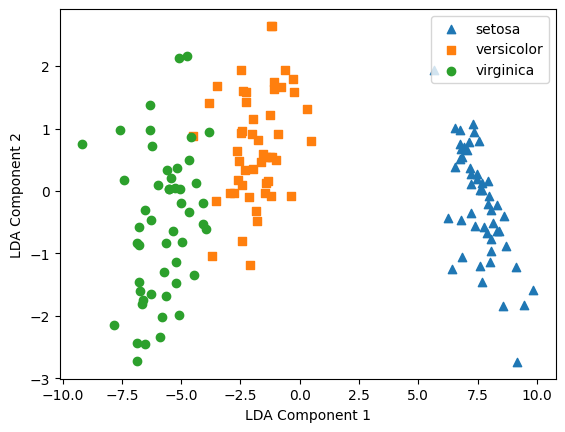

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# LDA 변환 결과를 DataFrame으로 변환
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()


In [35]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [36]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [37]:
Sigma_mat = np.diag(Sigma)
a_= np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [38]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [39]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [40]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [43]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\sigma 값 행렬:', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr, 3)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)
\sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.67

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-806651789.py:10: SyntaxWarning: invalid escape sequence '\s'
  print('\sigma 값 행렬:', Sigma)


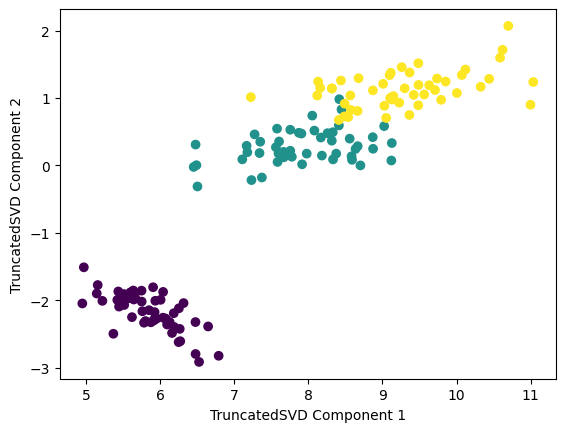

In [46]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# Iris 데이터 로드
iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_ftrs)

# 산점도로 시각화 (품종은 색깔로 구분)
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

plt.show()


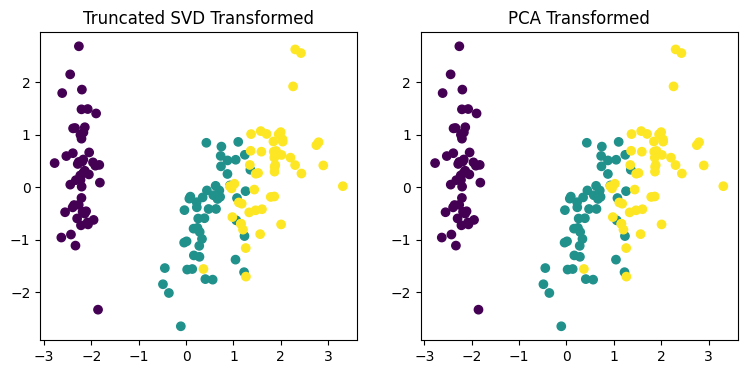

In [47]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
y = iris.target

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_scaled)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)

ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

plt.show()


In [50]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3376092728177866e-15
-6.938893903907228e-18


/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


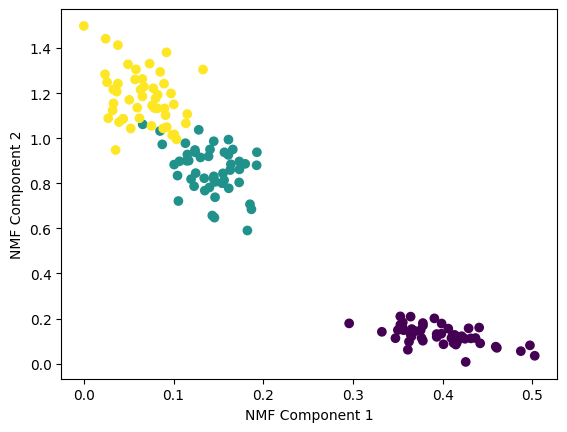

In [51]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components=2)
iris_nmf = nmf.fit_transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()